In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from Preprocessing import *

In [119]:
all_data, train, test = preprocessing()

In [120]:
categorical_feats = all_data.select_dtypes('object').columns
numerical_feats = all_data.select_dtypes('number').columns
print("Atributos numéricos:", len(numerical_feats))
print("Atributos categóricos:", len(categorical_feats))

Atributos numéricos: 36
Atributos categóricos: 43


In [121]:
z = (train['SalePrice'] - train['SalePrice'].mean())/train['SalePrice'].std()
len(z[z > 3])

19

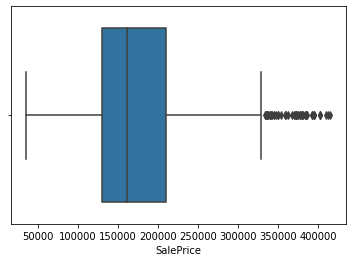

In [122]:

sns.boxplot(train['SalePrice'])

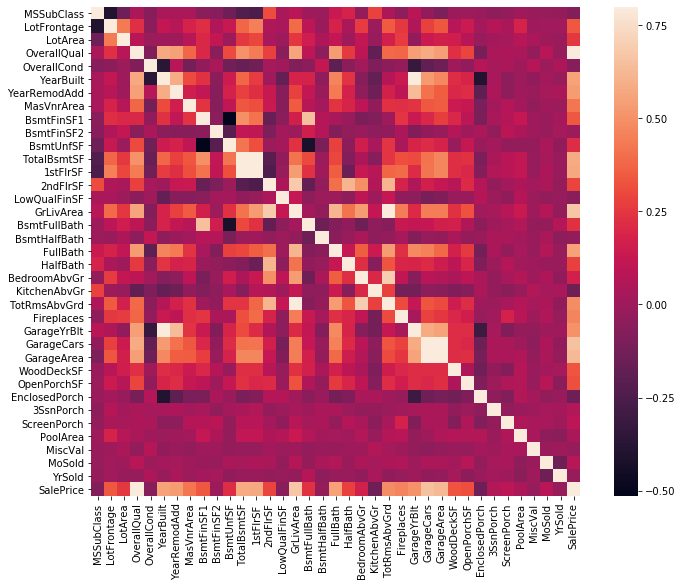

In [123]:
#correlation matrix
corrmat = train.drop(columns=['Id']).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [124]:
corr = corrmat['SalePrice'].sort_values(ascending=False)[1:]
corr = corr[corr>0.55]
best_feats = corr.keys()
for feat in best_feats:
    all_data[feat+'-s2'] = all_data[feat] ** 2
    all_data[feat+'-s3'] = all_data[feat] ** 3
    all_data[feat+'-sqrt'] = np.sqrt(all_data[feat])
corr = corrmat['SalePrice'].sort_values(ascending=False)[1:]
corr = corr[corr<0.1]
worst_feats = corr.keys()
for feat in worst_feats:
    all_data[feat] = 1/(1 + all_data[feat])
#all_data  = all_data.drop(columns=worst_feats)
    

In [125]:
all_data = pd.get_dummies(all_data)
#all_data.iloc[:, :] = MinMaxScaler().fit_transform(all_data)
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
#y = scaler.fit_transform(train['SalePrice'].values.reshape(-1, 1))
y = np.log1p(train['SalePrice'])

In [126]:
from sklearn.linear_model import LassoCV, RidgeCV, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
lasso = LassoCV(cv=5).fit(X_train, y)
print('LassoCV:',mean_squared_error(y, lasso.predict(X_train)))
ridge = RidgeCV(cv=5).fit(X_train, y)
print('RidgeCV:',mean_squared_error(y, ridge.predict(X_train)))
bayesian = BayesianRidge().fit(X_train, y)
print('BayesianRidge:',mean_squared_error(y, bayesian.predict(X_train)))
kr = KernelRidge().fit(X_train, y)
print('KernelRidge:',mean_squared_error(y, kr.predict(X_train)))
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train, y)
print('AdaBoostRegressor:',mean_squared_error(y, ada.predict(X_train)))
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y)
print('GradientBoostingRegressor:',mean_squared_error(y, gbr.predict(X_train)))

LassoCV: 0.059945385924478414


/home/matheus/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.1656e-25): result may not be accurate.
  overwrite_a=True).T
/home/matheus/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.62122e-25): result may not be accurate.
  overwrite_a=True).T
/home/matheus/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.2848e-25): result may not be accurate.
  overwrite_a=True).T
/home/matheus/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.32502e-25): result may not be accurate.
  overwrite_a=True).T
/home/matheus/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.52538e-24): result may not be accurate.
  overwrite_a=True).T
/home/matheus/.local/lib/python3.6/si

RidgeCV: 0.009640344036853188
BayesianRidge: 0.00985087851287917
KernelRidge: 0.02996488483467739
AdaBoostRegressor: 0.023625378252233892
GradientBoostingRegressor: 0.018232295177465975


In [ ]:
y_pred = np.expm1(0.0*kr.predict(X_test)+0.9*ridge.predict(X_test)+0.1*bayesian.predict(X_test))


In [ ]:
preds = pd.DataFrame()
preds['Id'] = test.Id
preds['SalePrice'] = y_pred

In [ ]:
preds.to_csv('preds.csv', index=False)

In [ ]:
preds.isna().any()

In [ ]:
pd.read_csv('preds.csv')